In [2]:
import os
if not os.path.exists("MNIST_dataset"):
    os.system("git clone https://github.com/DeepTrackAI/MNIST_dataset")

train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_images_files = sorted(os.listdir(train_path))

In [26]:
import matplotlib.pyplot as plt

train_images = []

for i in range(0,len(train_images_files),2):
    file = train_images_files[i]
    image = plt.imread(os.path.join(train_path,file))
    train_images.append(image)
    

In [4]:
print(len(train_images))

6000


In [25]:
train_digits = []
for i in range(0,len(train_images_files),2):
    file = train_images_files[i]
    filename = os.path.basename(file)
    digit = int(filename[0])
    train_digits.append(digit)

In [11]:
print(train_digits[-1])

9


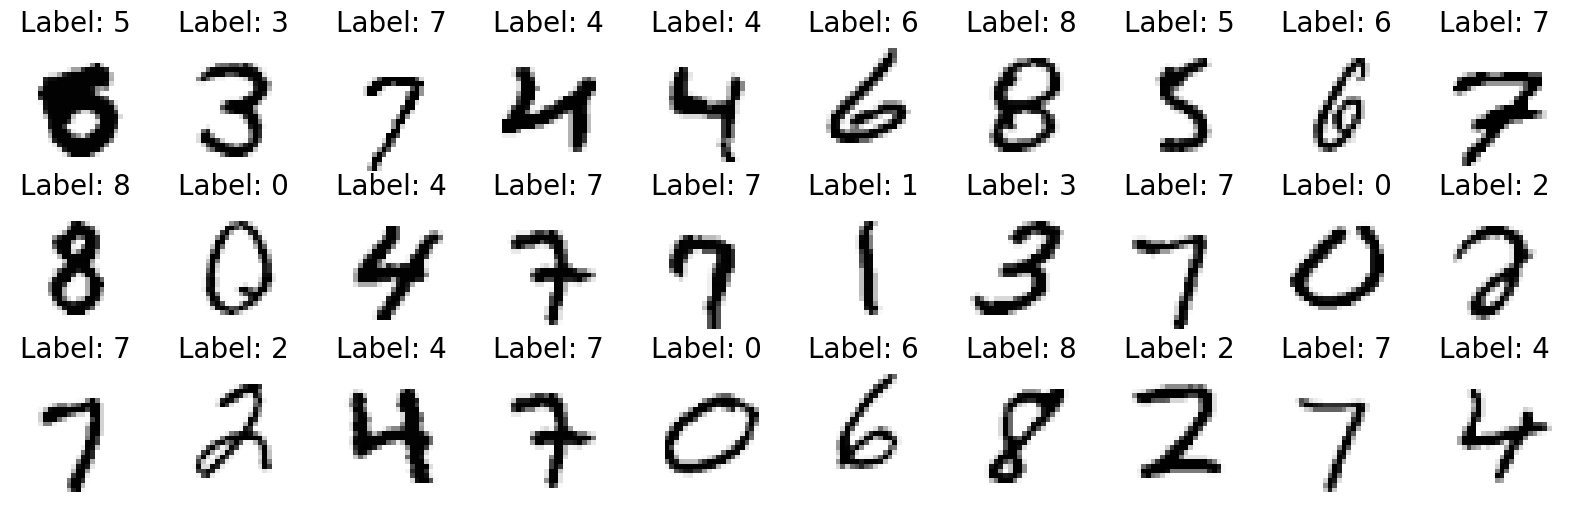

In [12]:
import numpy as np
fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(20,6))
for ax in axs.ravel():
    idx_image = np.random.choice(6000)
    ax.imshow(train_images[idx_image], cmap="Greys")
    ax.set_title(f"Label: {train_digits[idx_image]}", fontsize=20)
    ax.axis("off")
plt.show()

In [13]:
print(train_images[0].shape)

(28, 28)


In [27]:
import deeplay as dl
from torch.nn import Sigmoid

mlp_template = dl.MultiLayerPerceptron(
    in_features=28*28, hidden_features=[32,32], out_features=10,
)
mlp_template[...,"activation"].configure(Sigmoid)
mlp_model = mlp_template.create()
print(mlp_model)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Linear(in_features=784, out_features=32, bias=True)
      (activation): Sigmoid()
    )
    (1): LinearBlock(
      (layer): Linear(in_features=32, out_features=32, bias=True)
      (activation): Sigmoid()
    )
    (2): LinearBlock(
      (layer): Linear(in_features=32, out_features=10, bias=True)
      (activation): Sigmoid()
    )
  )
)


In [28]:
0 = [1 0 0 0 0 0 0 0 0 0]

3 = [0 0 0 1 0 0 0 0 0 0]





SyntaxError: invalid syntax. Perhaps you forgot a comma? (3376072998.py, line 1)

In [29]:
from torch.nn import MSELoss

classifier_template = dl.Classifier(
    model=mlp_template, num_classes=10, make_targets_one_hot=True,
    loss=MSELoss(), optimizer=dl.SGD(lr=0.1),
)
classifier = classifier_template.create()

In [18]:
print(classifier)

Classifier(
  (loss): MSELoss()
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=test
  )
  (model): MultiLayerPerceptron(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=784, out_features=32, bias=True)
        (activation): Sigmoid()
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): Sigmoid()
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=10, bias=True)
        (activation): Sigmoid()
      )
    )
  )
  (optimizer): SGD[SGD](lr=0.1)
)


In [30]:
train_images_digits = list(zip(train_images, train_digits))
train_data_loader = dl.DataLoader(train_images_digits, shuffle=True)

In [31]:
trainer = dl.Trainer(max_epochs=1, accelerator="auto")

In [32]:
trainer.fit(classifier, train_data_loader)

c:\Users\dmidt\anaconda3\envs\Deeplay\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name          ┃ Type                 ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss          │ MSELoss              │      0 │ train │
│ 1 │ train_metrics │ MetricCollection     │      0 │ train │
│ 2 │ val_metrics   │ MetricCollection     │      0 │ train │
│ 3 │ test_metrics  │ MetricCollection     │      0 │ train │
│ 4 │ model         │ MultiLayerPerceptron │ 26.5 K │ train │
│ 5 │ optimizer     │ SGD                  │      0 │ train │
└───┴───────────────┴──────────────────────┴────────┴───────┘

Trainable params: 26.5 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 26.5 K                                                                                               
Total estimated model params size (MB): 0

Output()

c:\Users\dmidt\anaconda3\envs\Deeplay\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


In [23]:
test_path = os.path.join("MNIST_dataset", "mnist", "test")
test_images_files = sorted(os.listdir(test_path))
test_images, test_digits = [], []
for i in range(0, len(test_images_files),10):
    file = test_images_files[i]
    image=plt.imread(os.path.join(test_path, file))
    test_images.append(image)

    filename = os.path.basename(file)
    digit = int(filename[0])
    test_digits.append(digit)

test_images_digits = list(zip(test_images, test_digits))
test_dataloader = dl.DataLoader(test_images_digits, shuffle=False)

In [33]:
trainer.test(classifier, test_dataloader)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric          ┃         DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testMulticlassAccuracy_epoch │      0.3310000002384186      │
│       test_loss_epoch        │     0.08669502288103104      │
└──────────────────────────────┴──────────────────────────────┘

[{'test_loss_epoch': 0.08669502288103104,
  'testMulticlassAccuracy_epoch': 0.3310000002384186}]

In [37]:
from seaborn import cubehelix_palette, heatmap
def plot_confusion_matrix(classifier, dataloader):

    confusion_matrix = np.zeros((10, 10), dtype=int)
    for image, gt_digit in dataloader:
        predictions = classifier(image)
        max_prediction, pred_digit = predictions.max(dim=1)
        np.add.at(confusion_matrix, (gt_digit, pred_digit), 1)
    plt.figure(figsize=(10, 8))
    heatmap(confusion_matrix, annot=True, fmt=".0f", square=True,
            cmap=cubehelix_palette(light=0.95, as_cmap=True), vmax=150)
    plt.xlabel("Predicted digit", fontsize=15)
    plt.ylabel("Ground truth digit", fontsize=15)
    plt.show()

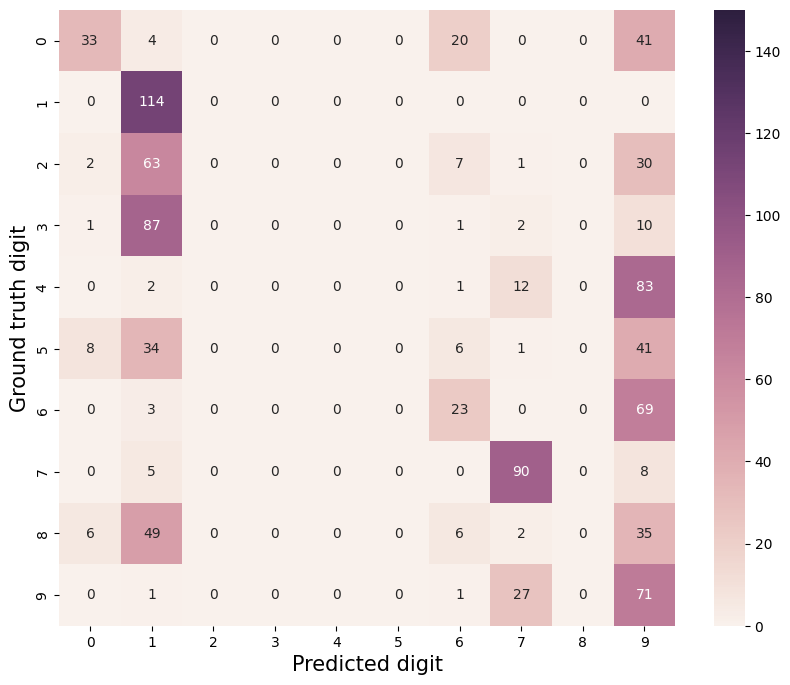

In [38]:
plot_confusion_matrix(classifier, test_dataloader)

In [39]:
from torch.nn import MSELoss
classifier_template = dl.Classifier(
    model=mlp_template, num_classes=10, make_targets_one_hot=True,
    optimizer=dl.SGD(lr=.1),
)
classifier = classifier_template.create()

print(classifier)

Classifier(
  (loss): CrossEntropyLoss()
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=test
  )
  (model): MultiLayerPerceptron(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=784, out_features=32, bias=True)
        (activation): Sigmoid()
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): Sigmoid()
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=10, bias=True)
        (activation): Sigmoid()
      )
    )
  )
  (optimizer): SGD[SGD](lr=0.1)
)
